In [230]:
!pip install patchify

In [314]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [232]:
minmaxscaler = MinMaxScaler()

In [233]:
!dir "E:\Users\Sumit\Downloads\archive\Semantic segmentation dataset"

 Volume in drive E is New Volume
 Volume Serial Number is 6410-1B69

 Directory of E:\Users\Sumit\Downloads\archive\Semantic segmentation dataset

03-02-2025  12:42    <DIR>          .
03-02-2025  12:42    <DIR>          ..
29-05-2020  09:00               548 classes.json
03-02-2025  12:42    <DIR>          Tile 1
03-02-2025  12:42    <DIR>          Tile 2
03-02-2025  12:42    <DIR>          Tile 3
03-02-2025  12:42    <DIR>          Tile 4
03-02-2025  12:42    <DIR>          Tile 5
03-02-2025  12:42    <DIR>          Tile 6
03-02-2025  12:42    <DIR>          Tile 7
03-02-2025  12:42    <DIR>          Tile 8
               1 File(s)            548 bytes
              10 Dir(s)  389,919,563,776 bytes free


In [233]:
!dir "E:\Users\Sumit\Downloads\archive\Semantic segmentation dataset"

 Volume in drive E is New Volume
 Volume Serial Number is 6410-1B69

 Directory of E:\Users\Sumit\Downloads\archive\Semantic segmentation dataset

03-02-2025  12:42    <DIR>          .
03-02-2025  12:42    <DIR>          ..
29-05-2020  09:00               548 classes.json
03-02-2025  12:42    <DIR>          Tile 1
03-02-2025  12:42    <DIR>          Tile 2
03-02-2025  12:42    <DIR>          Tile 3
03-02-2025  12:42    <DIR>          Tile 4
03-02-2025  12:42    <DIR>          Tile 5
03-02-2025  12:42    <DIR>          Tile 6
03-02-2025  12:42    <DIR>          Tile 7
03-02-2025  12:42    <DIR>          Tile 8
               1 File(s)            548 bytes
              10 Dir(s)  389,919,563,776 bytes free


In [234]:
dataset_root_folder = "E:\\Users\\Sumit\\Downloads\\archive\\Semantic segmentation dataset"

In [235]:
dataset_name = "DubaiDataset"

In [236]:
for path, subdirs, files in os.walk(dataset_root_folder, dataset_name):
    dir_name = path.split(os.path.sep)[-1]
    # print(dir_name)
    if dir_name == 'masks': #images
        images = os.listdir(path)
        #print(images)
        for i, image_name in enumerate(images):
            if (image_name.endswith('.png')):  #.jpg
                #print(image_name)
                a = True;

In [237]:
image_patch_size = 256

In [238]:
file_path = f'{dataset_root_folder}/Tile 1/images/image_part_001.jpg'
image = cv2.imread(file_path, 1)

In [239]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step = image_patch_size)
#print(image_patches)

In [287]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
    if image_type == 'images':
        image_extension = 'jpg'
    elif image_type == 'masks':
        image_extension = 'png'
    for tile_id in range(1,8):
        for image_id in range(1,20):
            image = cv2.imread(f'{dataset_root_folder}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
            if image is not None:
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                #print(image.shape)
                size_x = (image.shape[1]//image_patch_size)*image_patch_size
                size_y = (image.shape[0]//image_patch_size)*image_patch_size
                #print("{} -- {} - {}".format(image.shape, size_x, size_y))
                image = Image.fromarray(image)
                image = image.crop((0,0, size_x, size_y))
                image = np.array(image)

                #patchify the image 
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step = image_patch_size)
                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        if image_type == 'images':
                            individual_patched_image = patched_images[i,j,:,:]
                            #print(individual_patched_image.shape)
                            individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                            individual_patched_image = individual_patched_image[0]
                            #print(individual_patched_image.shape)
                            image_dataset.append(individual_patched_image)
                        elif image_type == 'masks':
                            individual_patched_mask = patched_images[i,j,:,:]
                            individual_patched_mask = individual_patched_mask[0]
                            mask_dataset.append(individual_patched_mask)

In [302]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [289]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


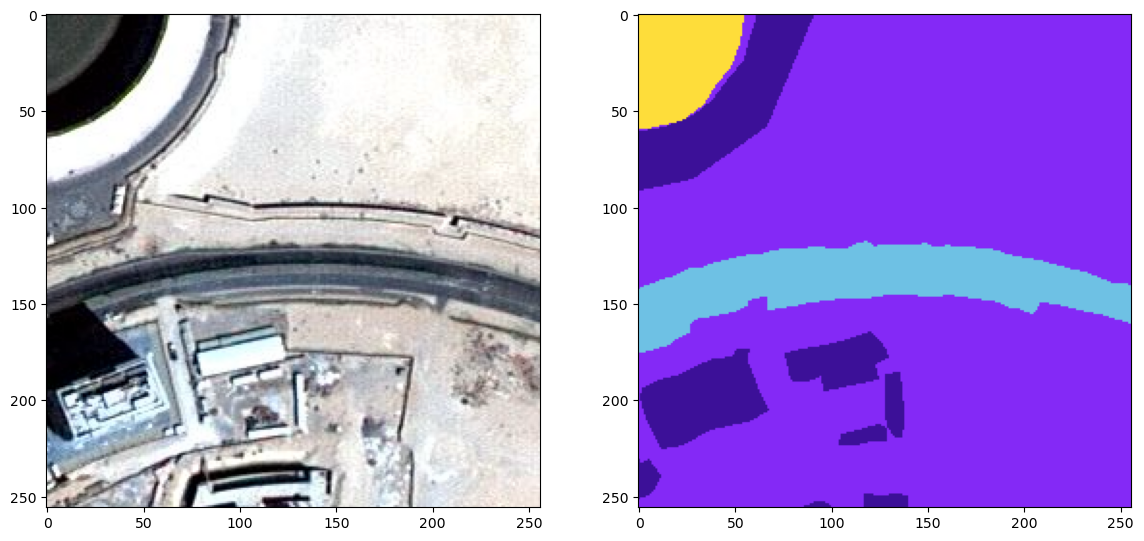

In [319]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [ ]:
#ONE HOT ENCODING

In [321]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [323]:
mask_dataset.shape

(945, 256, 256, 3)

In [327]:
label = individual_patched_mask

In [337]:
def rgb_to_label(label):
    label_segment = np.zeros(label.shape, dtype = np.uint8)
    label_segment[np.all(label == class_water, axis= -1)] = 0
    label_segment[np.all(label == class_land, axis=-1)] = 1
    label_segment[np.all(label == class_road, axis=-1)] = 2
    label_segment[np.all(label == class_building, axis=-1)] = 3
    label_segment[np.all(label == class_vegetation, axis=-1)] = 4
    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
    #print(label_segment.shape)
    label_segment = label_segment[:,:,0]
    return label_segment

In [339]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)

In [341]:
print(len(labels))

945


In [343]:
labels = np.array(labels)

In [347]:
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [349]:
labels = np.expand_dims(labels, axis=3)

In [351]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [353]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [355]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


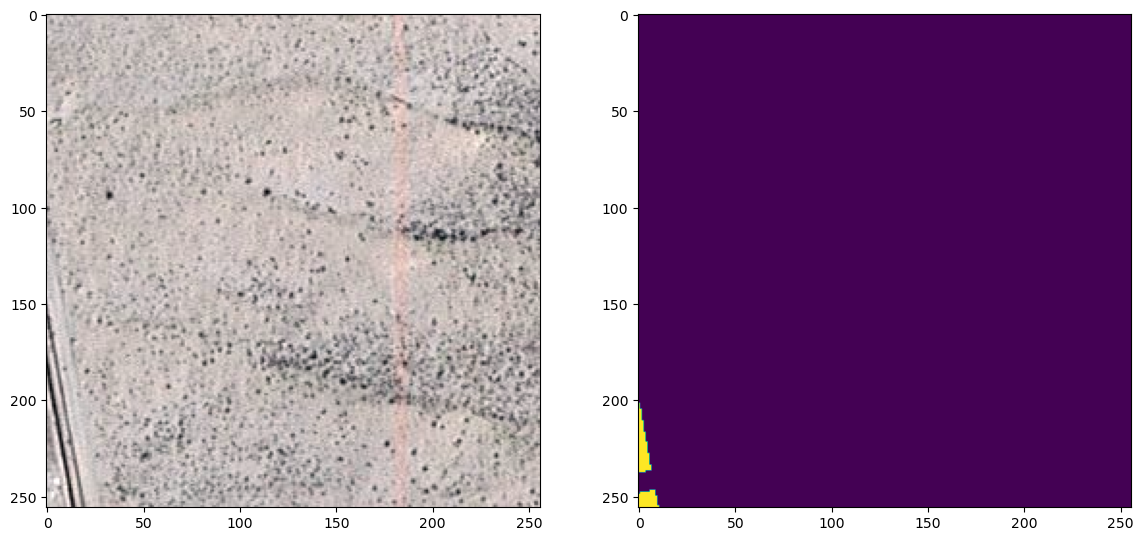

In [359]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [369]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [373]:
total_classes = np.unique(labels)
total_classes = len(total_classes)
print(total_classes)

6


In [361]:
#creating training and testing dataset

In [378]:
from tensorflow.keras.utils import to_categorical
label_categorical_dataset = to_categorical(labels, num_classes = total_classes)

In [380]:
master_training_dataset = image_dataset

In [409]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, label_categorical_dataset, test_size = 0.15, random_state = 100)

In [383]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [386]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [388]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6
